In [1]:
import numpy as np
import librosa
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../data/train.csv')

In [3]:
len(df)

9473

In [14]:
df.head()

,fname,label,manually_verified
0,00044347.wav,Hi-hat,0
1,001ca53d.wav,Saxophone,1
2,002d256b.wav,Trumpet,0
3,0033e230.wav,Glockenspiel,1
4,00353774.wav,Cello,1


In [4]:
import wave
from IPython.display import Audio

In [5]:
w = wave.open('../data/audio_train/00044347.wav')

In [12]:
print(w.getnchannels())
print(w.getframerate())
print(w.getsampwidth())
print(w.getnframes())

1
44100
2
617400


In [13]:
Audio('../data/audio_train/00044347.wav')

In [15]:
Audio('../data/audio_train/001ca53d.wav')

In [17]:
# calc nframes (duration)
df['nframes'] = df['fname'].apply(lambda f: wave.open('../data/audio_train/' + f).getnframes())
df['duration'] = df['nframes'] / 44100

In [20]:
df.head()

,fname,label,manually_verified,nframes,duration
0,00044347.wav,Hi-hat,0,617400,14.00
1,001ca53d.wav,Saxophone,1,455112,10.32
2,002d256b.wav,Trumpet,0,19404,0.44
3,0033e230.wav,Glockenspiel,1,352800,8.00
4,00353774.wav,Cello,1,199332,4.52


In [21]:
df.describe()

,manually_verified,nframes,duration
count,9473.000000,9.473000e+03,9473.000000
mean,0.391639,2.993507e+05,6.787997
std,0.488143,3.102745e+05,7.035704
min,0.000000,1.323000e+04,0.300000
25%,0.000000,7.144200e+04,1.620000
50%,0.000000,1.790460e+05,4.060000
75%,1.000000,4.136580e+05,9.380000
max,1.000000,1.323000e+06,30.000000


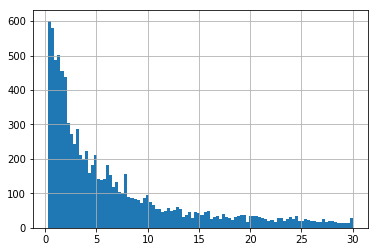

In [22]:
df.duration.hist(bins=100)

## Extract features

In [28]:
target = '../data/audio_train/001ca53d.wav'
y, sr = librosa.load(target, sr=None)

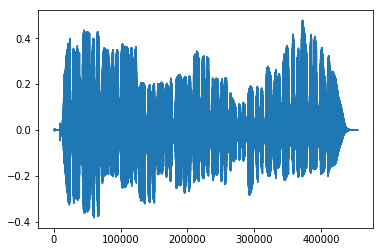

In [29]:
plt.plot(y)

In [30]:
sr

44100

In [31]:
4 * 44100  # 4秒のサンプル数

176400

In [59]:
def random_crop(y, max_length=176400):
    if len(y) > max_length:
        max_offset = len(y) - max_length
        offset = np.random.randint(max_offset)
        y = y[offset:max_length + offset]
    else:
        if max_length > len(y):
            max_offset = max_length - len(y)
            offset = np.random.randint(max_offset)
        else:
            offset = 0
        y = np.pad(y, (offset, max_length - len(y) - offset), 'constant')
    return y

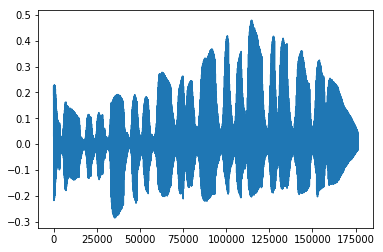

In [60]:
plt.plot(random_crop(y))

In [72]:
print(44100 * 0.025)
print(44100 * 0.010)

1102.5
441.0


In [76]:
n_fft = int(sr * 0.025)      # 25ms
hop_length = int(sr * 0.01)  # 10ms
n_mels = 64

print(sr, n_fft, hop_length, n_mels)

y_crop = random_crop(y)
mel = librosa.feature.melspectrogram(y=y_crop, sr=sr,
                                     n_fft=n_fft, hop_length=hop_length,
                                     n_mels=n_mels)

44100 1102 441 64


In [77]:
# (features, frames)
mel.shape

(64, 401)

In [78]:
4 * 44100 / 441

400.0